In [1]:
# https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
# Import required packages
import numpy as np
import numpy
import logging
import pyLDAvis.gensim
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

# Gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
import gensim

# Spacy
import spacy,re

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
text1 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-1.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text2 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-2.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text3 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-3.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text4 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-4.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text5 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-5.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text6 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-6.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text7 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-7.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text8 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-8.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text9 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-9.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text10 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-10.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text11 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-11.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text12 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-12.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text13 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-13.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text14 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-14.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text15 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-15.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text16 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-16.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text17 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-17.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text18 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-18.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text19 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-19.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text20 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-20.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text21 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-21.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text22 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-22.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text23 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-23.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text24 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-24.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text25 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-25.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text26 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-26.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text27 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-27.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text28 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-28.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text29 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-29.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text30 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-30.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text31 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-31.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text32 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-32.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text33 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-33.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text34 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-34.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text35 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-35.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text36 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-36.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text37 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-37.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text38 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-38.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text39 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-39.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text40 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-40.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text41 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-41.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text42 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-42.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text43 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-43.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text44 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-44.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text45 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-45.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text46 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-46.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text47 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-47.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text48 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-48.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text49 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-49.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text50 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-50.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text51 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-51.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text52 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-52.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text53 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-53.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text54 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-54.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text55 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-55.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text56 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-56.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text57 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-57.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text58 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-58.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text59 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-59.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text60 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-60.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text61 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-61.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text62 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-62.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text63 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-63.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text64 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-64.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text65 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-65.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text66 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-66.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text67 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-67.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text68 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-68.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text69 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-69.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text70 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-70.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text71 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-71.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text72 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-72.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text73 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-73.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text74 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-74.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text75 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-75.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text76 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-76.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text77 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-77.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text78 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-78.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text79 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-79.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text80 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-80.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text81 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-81.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text82 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-82.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text83 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-83.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text84 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-84.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text85 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-85.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text86 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-86.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text87 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-87.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text88 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-88.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text89 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-89.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text90 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-90.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text91 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-91.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text92 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-92.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text93 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-93.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text94 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-94.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text95 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-95.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text96 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-96.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text97 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-97.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text98 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-98.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text99 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-99.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text100 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\2018Regtech100\2018Regtech100公司資料\編碼資料\2018-100.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text101 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-1.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text102 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-2.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text103 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-3.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text104 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-4.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text105 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-5.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text106 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-6.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text107 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-7.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text108 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-8.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text109 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-9.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text110 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-10.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text111 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-11.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text112 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-12.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text113 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-13.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text114 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-14.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text115 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-15.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text116 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-16.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text117 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-17.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text118 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-18.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text119 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-19.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text120 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-20.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text121 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-21.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text122 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-22.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text123 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-23.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text124 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-24.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text125 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-25.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text126 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-26.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text127 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-27.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text128 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-28.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text129 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-29.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text130 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-30.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text131 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-31.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text132 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-32.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text133 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-33.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text134 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-34.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text135 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-35.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text136 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-36.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text137 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-37.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text138 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-38.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text139 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-39.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text140 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-40.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text141 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-41.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text142 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-42.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text143 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-43.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text144 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-44.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text145 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-45.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text146 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-46.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text147 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-47.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text148 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-48.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text149 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-49.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text150 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-50.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text151 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-51.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text152 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-52.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text153 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-53.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text154 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-54.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text155 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-55.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text156 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-56.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text157 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-57.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text158 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-58.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text159 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-59.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text160 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-60.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text161 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-61.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text162 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-62.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text163 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-63.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text164 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-64.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text165 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-65.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text166 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-66.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text167 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-67.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text168 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-68.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text169 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-69.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text170 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-70.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text171 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-71.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text172 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-72.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text173 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-73.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text174 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-74.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text175 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-75.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text176 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-76.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text177 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-77.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text178 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-78.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text179 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-79.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text180 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-80.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text181 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-81.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text182 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-82.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text183 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-83.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text184 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-84.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text185 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-85.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text186 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-86.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text187 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-87.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text188 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-88.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text189 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-89.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text190 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-90.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text191 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-91.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text192 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-92.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text193 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-93.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text194 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-94.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text195 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-95.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text196 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-96.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text197 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-97.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text198 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-98.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text199 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-99.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容
text200 = open(r"C:\Users\IDEA3C\Dropbox\Paper\論文\論文正式版\資料\Regtech100公司資料\編碼資料\2019-100.txt", "r", encoding="utf-8-sig").read()  # 导入需要计算的内容

In [3]:
doc_set = [
             text1, text2, text3,text4,text5,text6,text7,text8,text9,text10,
             text11,text12,text13,text14,text15,text16,text17,text18,text19,text20,
             text21,text22,text23,text24,text25,text26,text27,text28,text29,text30,
             text31,text32,text33,text34,text35,text36,text37,text38,text39,text40,
             text41,text42,text43,text44,text45,text46,text47,text48,text49,text50,
             text51,text52,text53,text54,text55,text56,text57,text58,text59,text60,
             text61,text62,text63,text64,text65,text66,text67,text68,text69,text70,
             text71,text72,text73,text74,text75,text76,text77,text78,text79,text80,
             text81,text82,text83,text84,text85,text86,text87,text88,text89,text90,
             text91,text92,text93,text94,text95,text96,text97,text98,text99,text100        
           ]

In [4]:
# Convert to array
docs = doc_set

In [5]:
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer


def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]

    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]

    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

    return docs

In [6]:
# Perform function on our document
docs = docs_preprocessor(docs)
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 640
Number of documents: 100
[[(0, 2), (1, 6), (2, 3), (3, 3), (4, 1), (5, 1), (6, 1), (7, 22), (8, 1), (9, 3), (10, 2), (11, 1), (12, 3), (13, 1), (14, 1), (15, 3), (16, 2), (17, 6), (18, 1), (19, 1), (20, 3), (21, 2), (22, 2), (23, 1), (24, 10), (25, 3), (26, 1), (27, 1), (28, 1), (29, 5), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 3), (41, 2), (42, 3), (43, 1), (44, 1), (45, 3), (46, 2), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 4), (56, 1), (57, 3), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 6), (66, 1), (67, 1), (68, 1), (69, 3), (70, 1), (71, 1), (72, 2), (73, 1), (74, 2), (75, 6), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 3), (83, 2), (84, 2), (85, 8), (86, 3), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 1), (93, 2), (94, 3), (95, 3), (96, 2), (97, 1), (98, 9), (99, 15), (100, 1), (101, 2), (102, 2), (103, 2), (104, 1), (

In [10]:
# Set parameters.
num_topics = 4
chunksize = 100
passes = 20
iterations = 50
eval_every = 1
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every,random_state=numpy.random.RandomState(123))
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

[(0, '0.013*"mifid" + 0.011*"content" + 0.009*"artificial_intelligence" + 0.009*"user_interface" + 0.009*"personal_data" + 0.009*"user_experience" + 0.008*"call" + 0.008*"video" + 0.007*"evidence" + 0.007*"mobile_device"'), (1, '0.023*"know_your" + 0.022*"risk_assessment" + 0.021*"identity_verification" + 0.019*"payment" + 0.018*"anti_money" + 0.014*"data_source" + 0.013*"financial_crime" + 0.013*"false_positive" + 0.011*"prevention" + 0.011*"card"'), (2, '0.018*"regulatory_change" + 0.018*"risk_assessment" + 0.015*"trading" + 0.014*"incident" + 0.014*"threat" + 0.014*"execution" + 0.012*"governance" + 0.012*"visibility" + 0.012*"plan" + 0.011*"fund"'), (3, '0.021*"investor" + 0.019*"know_your" + 0.019*"screening" + 0.016*"based_approach" + 0.014*"anti_money" + 0.013*"sanction_list" + 0.013*"false_positive" + 0.012*"your_existing" + 0.011*"customer_onboarding" + 0.011*"sanction_screening"')]


In [11]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3500176144518545


In [12]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -1.7581448818776422


In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,random_state=numpy.random.RandomState(123))
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

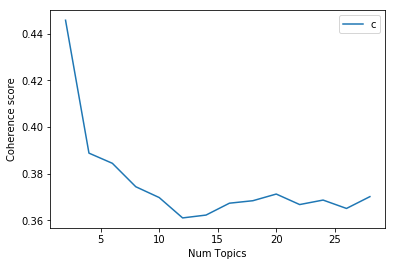

In [8]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=30, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4458
Num Topics = 4  has Coherence Value of 0.3888
Num Topics = 6  has Coherence Value of 0.3845
Num Topics = 8  has Coherence Value of 0.3744
Num Topics = 10  has Coherence Value of 0.3698
Num Topics = 12  has Coherence Value of 0.3611
Num Topics = 14  has Coherence Value of 0.3623
Num Topics = 16  has Coherence Value of 0.3674
Num Topics = 18  has Coherence Value of 0.3684
Num Topics = 20  has Coherence Value of 0.3713
Num Topics = 22  has Coherence Value of 0.3668
Num Topics = 24  has Coherence Value of 0.3687
Num Topics = 26  has Coherence Value of 0.3651
Num Topics = 28  has Coherence Value of 0.3702
